#  Word2vec

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Deep Learning with PyTorch (2020) Авторы: Eli Stevens, Luca Antiga, Thomas Viehmann
* https://radimrehurek.com/gensim/models/word2vec.html
* https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html
* https://pytorch.org/text/stable/vocab.html
* https://github.com/OlgaChernytska/word2vec-pytorch
* https://www.baeldung.com/cs/nlps-word2vec-negative-sampling
* https://towardsdatascience.com/implementing-word2vec-in-pytorch-from-the-ground-up-c7fe5bf99889

## Задачи для совместного разбора

1\. Рассмотрите основные шаги подготовки данных для обучения skip-gram модели

In [ ]:
text = "Спящий котик мило моргает своими яркими котик глазками"

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
corpus = [
    text.lower().split()
]

In [ ]:
vocab = build_vocab_from_iterator(corpus)

corpus_i = [
    vocab.lookup_indices(i)
    for i in corpus
]

In [ ]:
example = corpus_i[0]
inputs, outputs = [], []

for idx, word in enumerate(example):
  if idx == 0 or idx == len(example) - 1:
    continue
  inputs.append(word)
  outputs.append(example[idx-1])

  inputs.append(word)
  outputs.append(example[idx+1])

In [ ]:
import torch as th

In [ ]:
inputs = th.tensor(inputs, dtype=th.long)
outputs = th.tensor(outputs, dtype=th.long)

In [ ]:
corpus_i

[[5, 0, 2, 3, 4, 6, 0, 1]]

In [ ]:
import pandas as pd

pd.DataFrame({'inputs':inputs, 'outputs':outputs})

,inputs,outputs
0,0,5
1,0,2
2,2,0
3,2,3
4,3,2
5,3,4
6,4,3
7,4,6
8,6,4
9,6,0


In [ ]:
inputs

tensor([0, 0, 2, 2, 3, 3, 4, 4, 6, 6, 0, 0])

In [ ]:
outputs

tensor([5, 2, 0, 3, 2, 4, 3, 6, 4, 0, 6, 1])

2\. Рассмотрите основные шаги по настройке skip-gram модели

In [ ]:
import torch.nn as nn

embeddings = nn.Embedding(num_embeddings=len(vocab), embedding_dim=300)

In [ ]:
fc = nn.Linear(in_features=300, out_features=len(vocab))

In [ ]:
x_e = embeddings(inputs)
out = fc(x_e)
out.shape

torch.Size([12, 7])

In [ ]:
outputs

tensor([5, 2, 0, 3, 2, 4, 3, 6, 4, 0, 6, 1])

In [ ]:
out # логиты

tensor([[-0.2841,  0.8229, -0.4753, -0.1669, -0.2996, -0.3579, -0.7807],
        [-0.2841,  0.8229, -0.4753, -0.1669, -0.2996, -0.3579, -0.7807],
        [ 0.4204,  1.3088, -0.1910,  0.3833,  0.1082,  0.0196, -0.2649],
        [ 0.4204,  1.3088, -0.1910,  0.3833,  0.1082,  0.0196, -0.2649],
        [ 0.2554,  0.0577,  0.8818,  0.0839,  0.3493,  0.4843, -0.1252],
        [ 0.2554,  0.0577,  0.8818,  0.0839,  0.3493,  0.4843, -0.1252],
        [ 0.1102, -0.0991,  0.5144, -0.4330,  0.8812,  1.0014, -0.2751],
        [ 0.1102, -0.0991,  0.5144, -0.4330,  0.8812,  1.0014, -0.2751],
        [-0.3661,  0.0699, -0.1765,  1.3322,  0.4024, -0.4020,  0.2658],
        [-0.3661,  0.0699, -0.1765,  1.3322,  0.4024, -0.4020,  0.2658],
        [-0.2841,  0.8229, -0.4753, -0.1669, -0.2996, -0.3579, -0.7807],
        [-0.2841,  0.8229, -0.4753, -0.1669, -0.2996, -0.3579, -0.7807]],
       grad_fn=<AddmmBackward0>)

In [ ]:
model = nn.Sequential(
    nn.Embedding(num_embeddings=len(vocab), embedding_dim=300),
    nn.Linear(in_features=300, out_features=len(vocab))
)
crit = nn.CrossEntropyLoss() # уже заложен softmax
out = model(inputs)
loss = crit(out, inputs)
loss

tensor(1.9046, grad_fn=<NllLossBackward0>)

In [ ]:
embeddings = nn.Embedding(
    num_embeddings=len(vocab),
    embedding_dim=16,
    max_norm=1)

inputs_e = embeddings(inputs)
outputs_e = embeddings(outputs)

In [ ]:
inputs_e.shape

torch.Size([12, 16])

In [ ]:
inputs_e[0] @ outputs_e[0]

tensor(-0.2536, grad_fn=<DotBackward0>)

In [ ]:
o = inputs_e.view(-1,1, 16).bmm(outputs_e.view(-1, 16, 1))
o

tensor([[[-0.2536]],

        [[ 0.0558]],

        [[ 0.0558]],

        [[-0.0652]],

        [[-0.0652]],

        [[ 0.3707]],

        [[ 0.3707]],

        [[ 0.0503]],

        [[ 0.0503]],

        [[ 0.1473]],

        [[ 0.1473]],

        [[-0.1129]]], grad_fn=<BmmBackward0>)

## Задачи для самостоятельного решения

<p class="task" id="1"></p>

1\. Загрузите тексты новостей из файла `news_500.csv`. Удалите из текстов все знаки препинания и символы не из русского алфавита, приведите все слова к нижнему регистру и удалите стоп-слова. Разбейте текст каждой новости, удалив из них стоп-слова. Разбейте текст каждой новости на фрагменты по 3 предложения и сохраните в виде списка строк. Выведите на экран длину полученного списка.

- [ ] Проверено на семинаре

In [ ]:
import pandas as pd

df = pd.read_csv('news_500.csv', usecols=['text'])
df.head()

,text
0,"Президент России Владимир Путин считает, что к..."
1,Перед отъездом Я.Арафат провел совещание с пре...
2,В связи с этим власти дали разрешение на прове...
3,"По словам Р.Вяхирева, это будет открытый тенде..."
4,"Литературная премия, обладатель которой обычно..."


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = stopwords.words('russian')

In [ ]:
import re

In [ ]:
def split_sent(sents):
    b = []
    k = 3
    pure_sents = []
    sents = sent_tokenize(
        sents.lower()
        )
    for sent in sents:
        pure_sent = ''
        words = word_tokenize(
            re.sub(r'[^а-я]', ' ', sent)
            )
        sent = [word for word in words if word not in stopwords]
        pure_sent = ' '.join(sent)
        pure_sents.append(pure_sent)
    for i in range(0, len(pure_sents),3):
        b.append(' '.join(pure_sents[i:k]))
        k += 3
    return b

In [ ]:
corpus = df['text'].apply(split_sent).sum()

In [ ]:
corpus[:2]

['президент россии владимир путин считает концепция реформирования армии должна готова ноябрю такое заявление сделал совещанием членов совета безопасности рф сообщили рбк администрации президента путин также отметил эта реформа должна проводиться учетом проблем существующих настоящее время вооруженных силах рф',
 'одну таких проблем путин охарактеризовал параллелизм армейских структур основная цель реформирования армии сделать эффективной особенное внимание следует уделить социальным вопросам обеспечения военнослужащих']

In [ ]:
len(corpus)

1958

<p class="task" id="2"></p>

2\. Настройте модель Word2Vec из пакета `gensim`. Для валидации выведите на экран информацию о ближайших словах для нескольких случайно выбранных токенов из обучающей выборки.

- [ ] Проверено на семинаре

In [ ]:
from gensim.models import Word2Vec

In [ ]:
corpus_words = list(
    map(
        lambda x: word_tokenize(x),
        corpus
    )
)

In [ ]:
model = Word2Vec(corpus_words, vector_size=300, window=5, min_count=1)

In [ ]:
from random import choices

In [ ]:
all_words = [word for sublist in corpus_words for word in sublist]

In [ ]:
random_words = choices(all_words, k=5)
random_words

['убийств', 'задолженность', 'скоро', 'торгах', 'публично']

In [ ]:
for word in random_words:
    similar_words = model.wv.most_similar(word, topn=10)
    print(word, [sw[0] for sw in similar_words])

убийств ['адвокат', 'терактов', 'действия', 'вместе', 'году', 'комиссии', 'партии', 'образом', 'сил', 'руководством']
задолженность ['также', 'против', 'компании', 'сегодня', 'отметил', 'словам', 'это', 'однако', 'мнению', 'напомним']
скоро ['американской', 'рынке', 'двух', 'период', 'дело', 'правления', 'органов', 'республики', 'действия', 'программы']
торгах ['москвы', 'это', 'российских', 'связи', 'стран', 'против', 'время', 'президент', 'сша', 'кроме']
публично ['сергей', 'акции', 'вопросы', 'время', 'москве', 'вопрос', 'либо', 'должна', 'государства', 'управления']


<p class="task" id="3"></p>

3. Опишите класс `W2VDataset`, который реализует в себе логику получения контекстного окна для обучения skip-gram модели. При создании словаря игнорируйте токены, которые встретились меньше 20 раз. Продемонстрируйте пример работы.

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

In [ ]:
from collections import Counter
from torchtext.vocab import vocab

In [ ]:
class W2VDataset:
    def __init__(self, corpus, min_count=20, window=3):
        self.window = window
        counter = Counter()
        for text in corpus:
            counter.update(word_tokenize(text))
        self.vocab = vocab(counter, min_freq=min_count)
        self.corpus_i = [
                            [self.vocab.lookup_indices([word])[0]
                             for word in word_tokenize(sent)
                             if word in self.vocab.get_stoi().keys()
                             ]
                          for sent in corpus
                        ]

    def sk(self):
        outputs, inputs = [], []
        for sent in self.corpus_i:
            for idx, word in enumerate(sent):
              if idx < self.window // 2 or idx > len(sent) - (self.window // 2) - 1:
                continue
              inputs.extend([word] * (self.window - 1))

              outputs.extend(sent[idx-(self.window//2):idx])
              outputs.extend(sent[idx+1:idx+(self.window//2)+1])
        return inputs, outputs

In [ ]:
corpus = df['text'].apply(split_sent).sum()
v2vdset = W2VDataset(corpus)
inputs, outputs = v2vdset.sk()

In [ ]:
df_test = pd.DataFrame({'inputs':inputs, 'outputs':outputs})
df_test.head()

,inputs,outputs
0,1,0
1,1,2
2,2,1
3,2,3
4,3,2


<p class="task" id="4"></p>

4\. Реализуйте и настройте skip-gram модель. Перед началом обучения выберите случайным образом несколько слов из датасета и для каждого из них выведите на экран 3 ближайших слова в смысле косинусной близости между эмбеддингами. В процессе настройки для валидации периодически выводите на экран информацию о ближайших словах для этих слов. Выведите на экран график значения функции потерь в зависимости от номера эпохи.  

![image.png](attachment:image.png)

- [ ] Проверено на семинаре

In [ ]:
import torch.nn as nn
import torch.optim as optim
from numpy.random import choice
from numpy.linalg import norm
import numpy as np

In [ ]:
class SkipGramModel(nn.Module):
    def __init__(self, num_embeddings, embedding_dim, in_features, out_features):
        super().__init__()
        self.emb = nn.Embedding(num_embeddings=num_embeddings, embedding_dim=embedding_dim)
        self.fc = nn.Linear(in_features=in_features, out_features=out_features)

    def forward(self, X):
        out = self.emb(X)
        out = self.fc(out)
        return out

In [ ]:
def similarity(words, emb):
    for word in words:
        vec = model.emb(th.tensor(word)).reshape(1, -1)
        sim = th.argsort(
            (vec @ emb.T / ((vec**2).sum(axis=1)**.5 * (emb**2).sum(axis=1)**.5))[0][1:],
            descending=True
            )[:3]
        print(
              v2vdset.vocab.lookup_tokens([word])[0],
              v2vdset.vocab.lookup_tokens(list(sim))
            )

In [ ]:
model = SkipGramModel(len(v2vdset.vocab), 300, 300, len(v2vdset.vocab))

words = choice(len(v2vdset.vocab), 3)
emb = model.emb.weight
similarity(words, emb)
print()

lr = 0.1
n_epochs = 20
crit = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)
losses = []

for epoch in range(n_epochs):
    out = model.forward(th.tensor(inputs, dtype=th.long))
    loss = crit(out, th.tensor(outputs, dtype=th.long))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    losses.append(loss.item())
    if epoch % 5 == 0 or epoch == n_epochs:
        print(f'epoch={epoch}, loss={loss.item()}')
        emb = model.emb.weight
        similarity(words, emb)
        print()

руководством ['энергокомпании', 'поскольку', 'лидеров']
представителей ['россию', 'владимира', 'проведение']
банки ['етс', 'долл', 'человек']

epoch=0, loss=6.550697326660156
руководством ['энергокомпании', 'поскольку', 'ремезов']
представителей ['россию', 'владимира', 'проведение']
банки ['етс', 'долл', 'человек']

epoch=5, loss=9.006744384765625
руководством ['энергокомпании', 'стало', 'поскольку']
представителей ['россию', 'владимира', 'проведение']
банки ['етс', 'долл', 'продажи']

epoch=10, loss=6.849794864654541
руководством ['энергокомпании', 'стало', 'поскольку']
представителей ['россию', 'владимира', 'июня']
банки ['етс', 'кох', 'сообщили']

epoch=15, loss=5.40352725982666
руководством ['энергокомпании', 'которых', 'государственного']
представителей ['россию', 'владимира', 'течение']
банки ['етс', 'сообщили', 'сообщалось']



In [ ]:
len(losses)

20

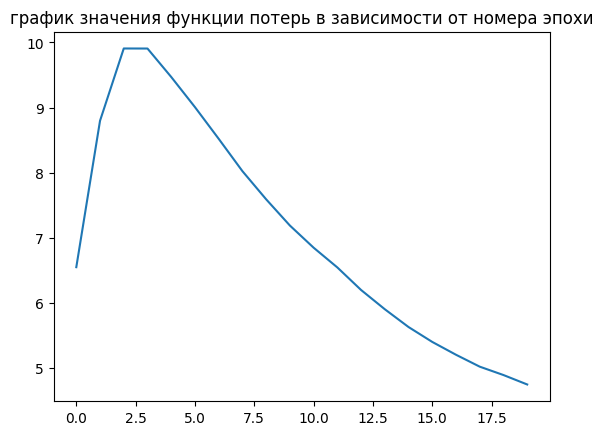

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(0,20), losses)
plt.title('график значения функции потерь в зависимости от номера эпохи');

<p class="task" id="5"></p>

5\. Реализуйте класс `NegativeSampler`, который позволяет сгенерировать набор отрицательных примеров. Для генерации отрицательных примеров выбирайте токены пропорционально величине $C(w)^{\frac{3}{4}}$, где $C(w)$ - частота токена в корпусе.


- [ ] Проверено на семинаре

In [ ]:
class NegativeSampler:
    def __init__(self, corpus):
        self.word_corpus = []
        for sent in corpus:
            for word in word_tokenize(sent):
                self.word_corpus.append(word)
        self.token_freqs = self.calculate_token_frequencies()

    def calculate_token_frequencies(self):
        token_freq = nltk.FreqDist(self.word_corpus)
        return {tok: f ** 0.75 for tok, f in token_freq.items()}

    def generate_negative_samples(self, num_samples):
        prob_dist = nltk.probability.DictionaryProbDist(self.token_freqs, normalize=True)
        negative_samples = [prob_dist.generate() for i in range(num_samples)]
        return negative_samples

In [ ]:
ns = NegativeSampler(corpus)
ns.generate_negative_samples(3)

['зависящие', 'розничным', 'состоится']

In [ ]:
inputs = th.tensor(inputs, dtype=th.long)
outputs = th.tensor(outputs, dtype=th.long)

<ipython-input-69-0d77efd19c74>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = th.tensor(inputs, dtype=th.long)


<p class="task" id="6"></p>

6\. Реализуйте и настройте skip-gram модель с использованием negative sampling. Перед началом обучения выберите случайным образом несколько слов из датасета и для каждого из них выведите на экран 3 ближайших слова в смысле косинусной близости между эмбеддингами. В процессе настройки для валидации периодически выводите на экран информацию о ближайших словах для этих слов. Выведите на экран график значения функции потерь в зависимости от номера эпохи.  

- [ ] Проверено на семинаре

In [ ]:
class SGNSModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Embedding(len(v2vdset.vocab), 300)
        self.c = nn.Embedding(len(v2vdset.vocab), 300)
    def forward(self, tgt, ctx):
        tgt_emb = self.w(tgt)
        n_batch, emb_dim = tgt_emb.shape
        n_ctx = ctx.shape
        tgt_emb = tgt_emb.view(n_batch, 1, emb_dim)
        ctx_emb = self.c(ctx)
        ctx_emb = ctx_emb.view(n_batch, emb_dim, 1)
        dots = tgt_emb.bmm(ctx_emb)
        return dots.view(dots.shape[0], 1)

In [ ]:
neg_examples = ns.generate_negative_samples(len(inputs)//2)

In [ ]:
neg_indx = th.tensor([v2vdset.vocab.lookup_indices([word])[0]
                for word in neg_examples
                if word in v2vdset.vocab.get_stoi().keys()
                             ], dtype=th.long)

In [ ]:
sg = SGNSModel()
sg.forward(inputs, outputs)

tensor([[ -6.2248],
        [ -5.4925],
        [ -8.4952],
        ...,
        [ 27.6840],
        [ 16.6786],
        [-16.9087]], grad_fn=<ViewBackward0>)

## Обратная связь
- [x] Хочу получить обратную связь по решению